In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bike_sharing_HypoTest.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display statistical summary of the dataset
print(df.describe())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


Missing values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Convert categorical variables to 'category' data type
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

# Check data types again to confirm
print("Updated data types after conversion:")
print(df.dtypes)


Updated data types after conversion:
datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


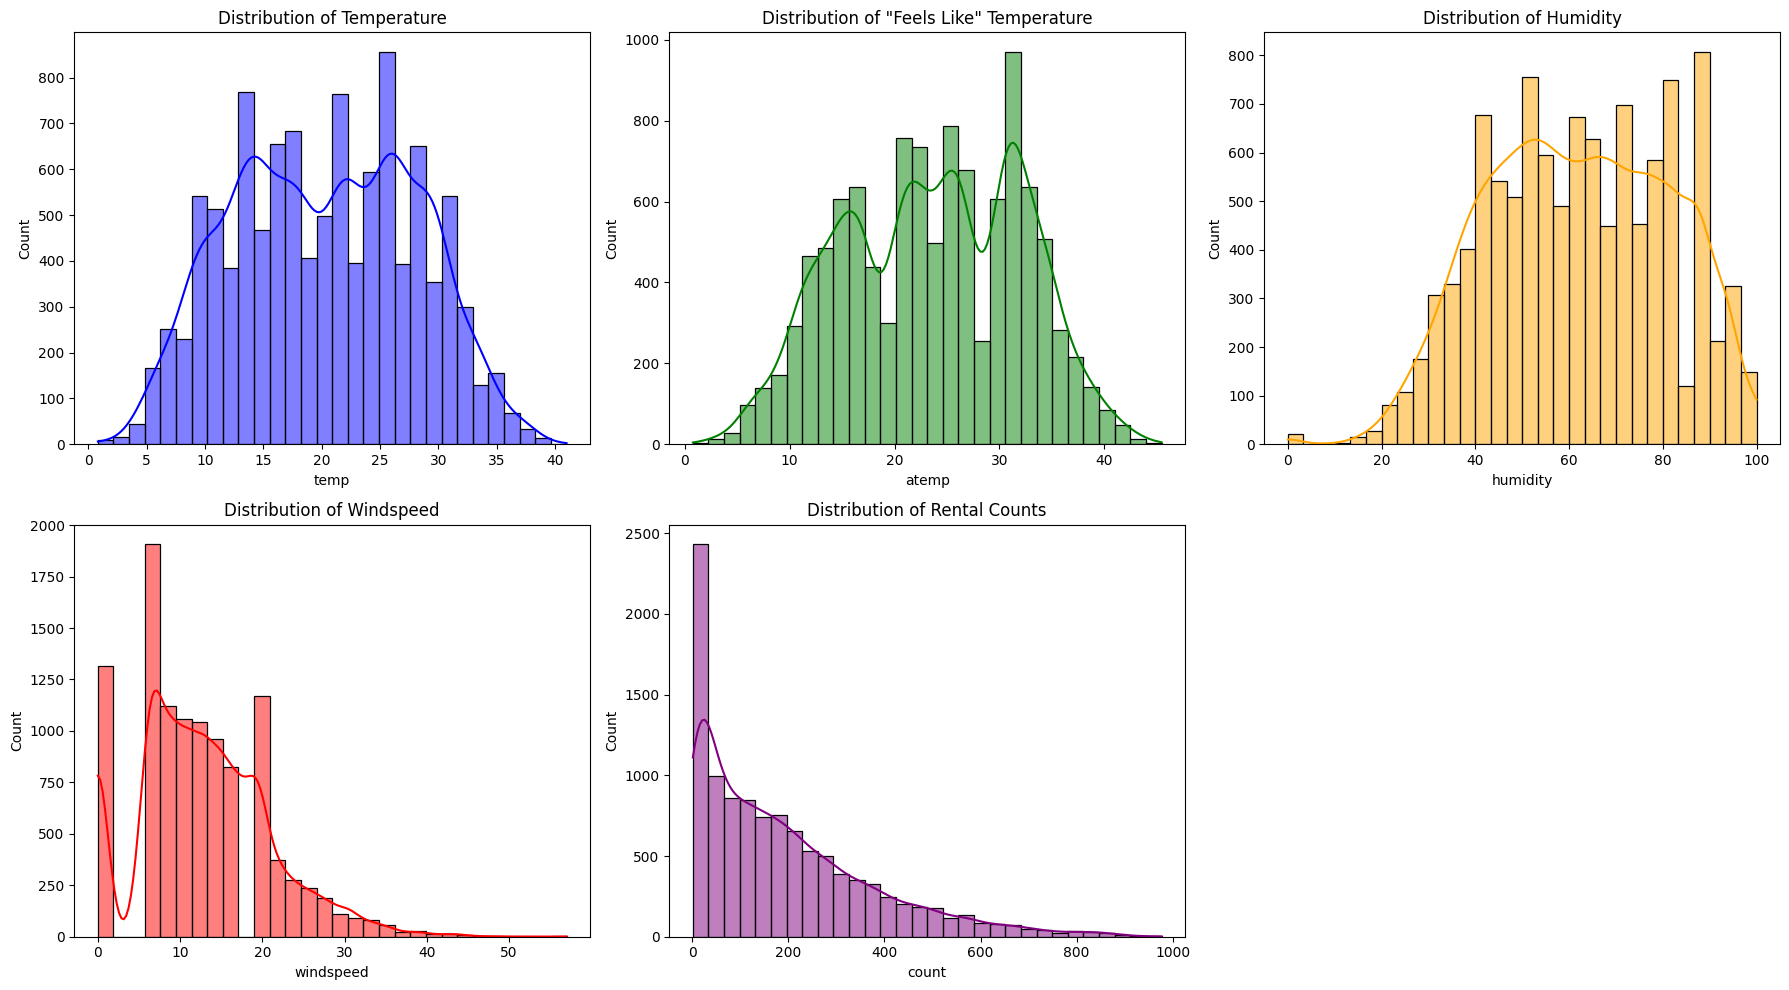

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot distribution of continuous variables
sns.histplot(df['temp'], ax=axes[0, 0], kde=True, bins=30, color='blue')
axes[0, 0].set_title('Distribution of Temperature')

sns.histplot(df['atemp'], ax=axes[0, 1], kde=True, bins=30, color='green')
axes[0, 1].set_title('Distribution of "Feels Like" Temperature')

sns.histplot(df['humidity'], ax=axes[0, 2], kde=True, bins=30, color='orange')
axes[0, 2].set_title('Distribution of Humidity')

sns.histplot(df['windspeed'], ax=axes[1, 0], kde=True, bins=30, color='red')
axes[1, 0].set_title('Distribution of Windspeed')

sns.histplot(df['count'], ax=axes[1, 1], kde=True, bins=30, color='purple')
axes[1, 1].set_title('Distribution of Rental Counts')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


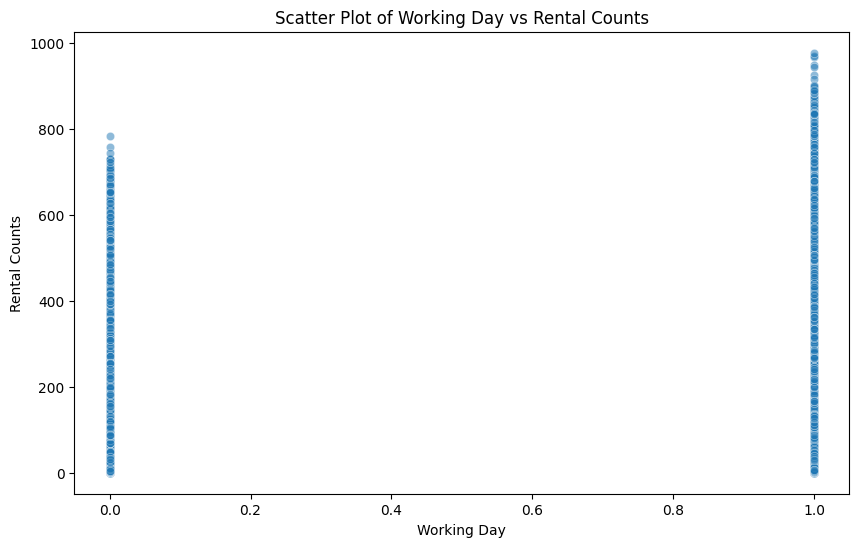

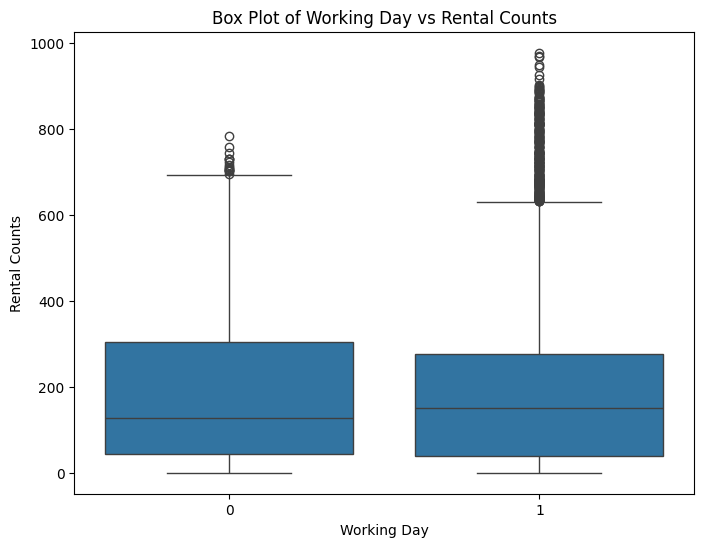

In [ ]:
# Scatter plot of workingday vs count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='workingday', y='count', data=df, alpha=0.5)
plt.title('Scatter Plot of Working Day vs Rental Counts')
plt.xlabel('Working Day')
plt.ylabel('Rental Counts')
plt.show()

# Box plot of workingday vs count
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Box Plot of Working Day vs Rental Counts')
plt.xlabel('Working Day')
plt.ylabel('Rental Counts')
plt.show()


Insights:

From the scatter plot, it appears that there are generally higher rental counts on working days (workingday = 1) compared to non-working days (workingday = 0).

The box plot confirms that the median rental counts are higher on working days, with potentially more outliers on non-working days.

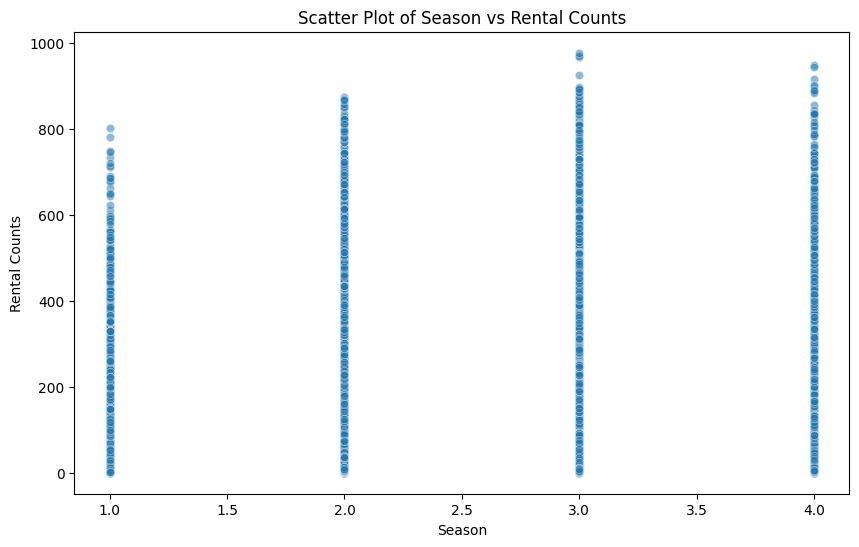

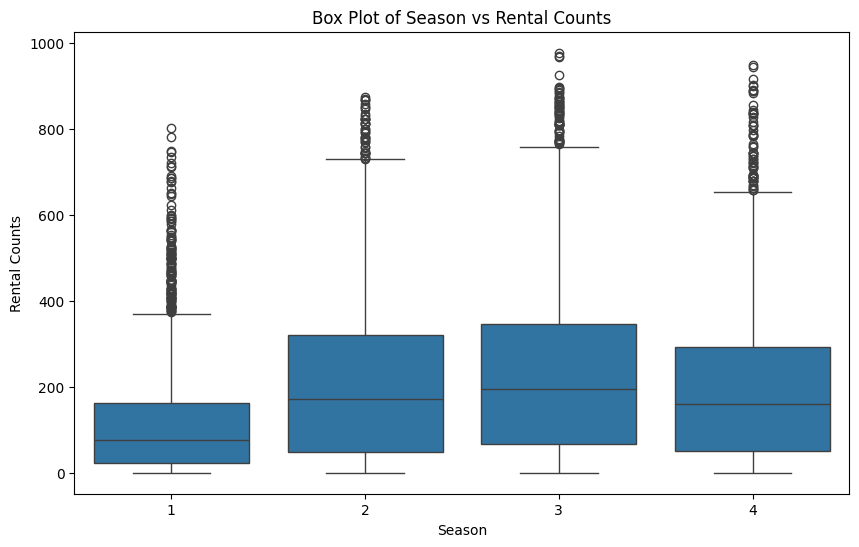

In [ ]:
# Scatter plot of season vs count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='season', y='count', data=df, alpha=0.5)
plt.title('Scatter Plot of Season vs Rental Counts')
plt.xlabel('Season')
plt.ylabel('Rental Counts')
plt.show()

# Box plot of season vs count
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Box Plot of Season vs Rental Counts')
plt.xlabel('Season')
plt.ylabel('Rental Counts')
plt.show()


Insights:

The scatter plot shows varying rental counts across different seasons, with potentially higher counts in seasons 2 (summer) and 3 (fall).

The box plot indicates that the median rental counts are higher in summer and fall compared to spring and winter.

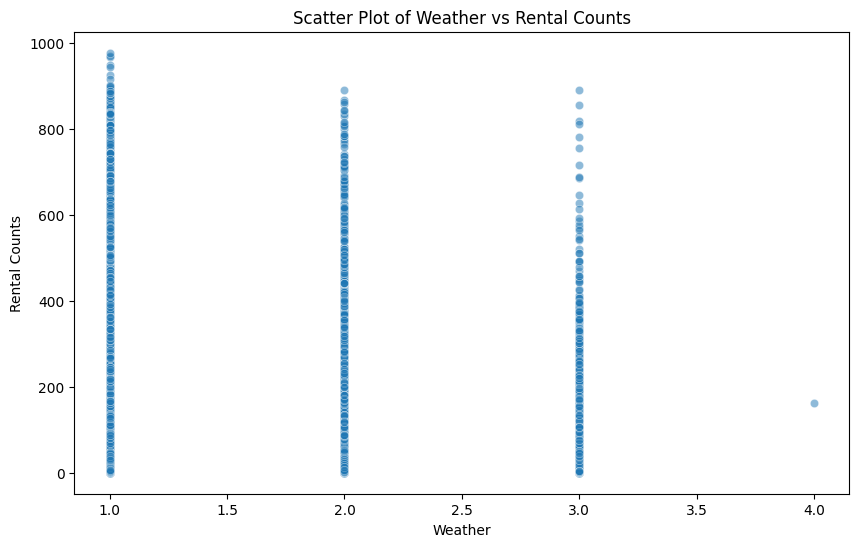

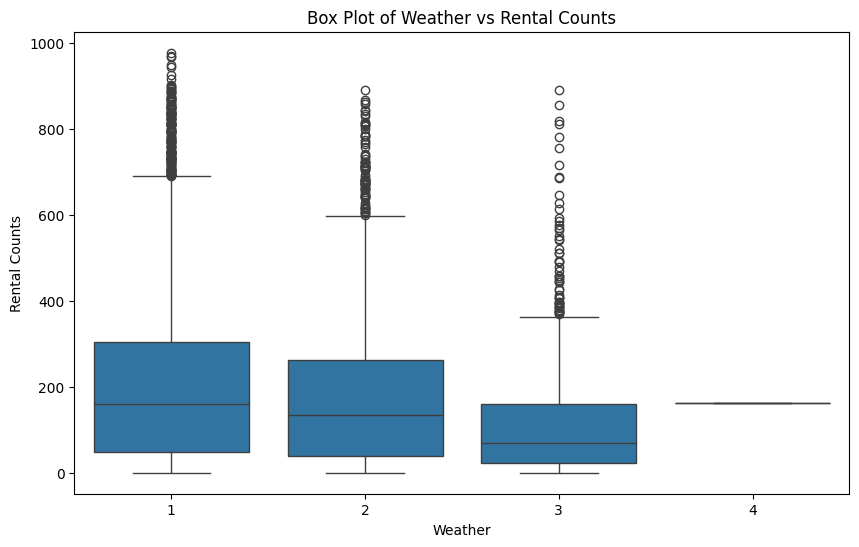

In [ ]:
# Scatter plot of weather vs count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weather', y='count', data=df, alpha=0.5)
plt.title('Scatter Plot of Weather vs Rental Counts')
plt.xlabel('Weather')
plt.ylabel('Rental Counts')
plt.show()

# Box plot of weather vs count
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Box Plot of Weather vs Rental Counts')
plt.xlabel('Weather')
plt.ylabel('Rental Counts')
plt.show()


Insights:

The scatter plot suggests that rental counts are generally lower under weather conditions 3 (light rain/snow) and 4 (heavy rain/snow).

The box plot shows that the median rental counts are significantly lower during weather conditions 3 and 4 compared to conditions 1 and 2.

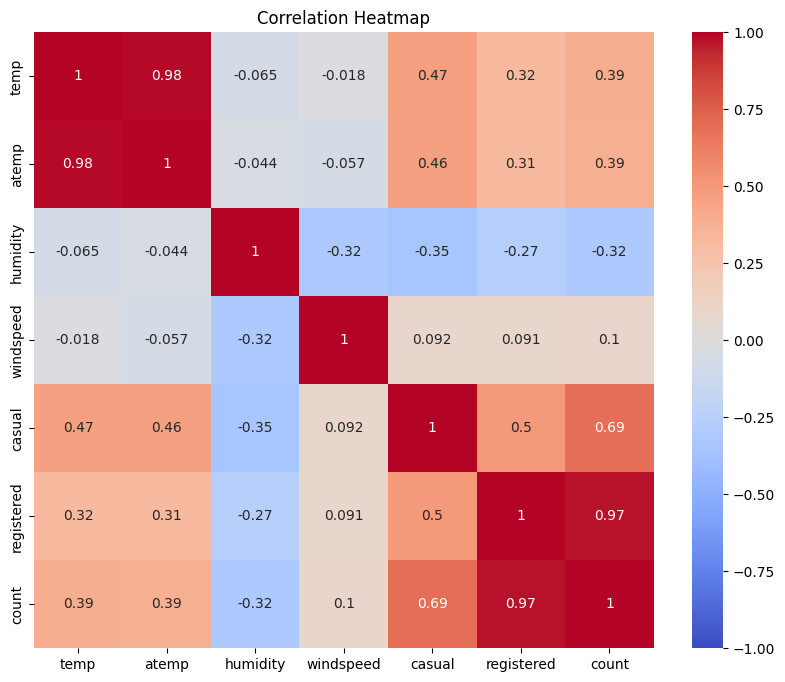

In [ ]:
# Calculate correlation matrix
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Insights from Correlation Heatmap:

temp and atemp have a strong positive correlation, indicating they are closely related (which is expected since atemp is derived from temp).

humidity and windspeed show very weak correlations with count, suggesting they have minimal direct impact on rental counts.

casual and registered users show strong positive correlations with count, indicating that total rental counts (count) are influenced by both types of users.

Summary:
The bivariate analysis provides insights into how different variables relate to rental counts (count) in the Yulu dataset.

Working days, seasons, and weather conditions all appear to influence rental counts, with varying degrees of impact.

The correlation heatmap helps to understand relationships between continuous variables and the target variable (count), as well as between other variables of interest.

**Hypothesis Testing**
1. Working Day Effect on Number of Electric Cycles Rented
Hypothesis Formulation:

Null Hypothesis (H0): Working day has no effect on the number of electric cycles rented.

Alternative Hypothesis (H1): Working day has an effect on the number of electric cycles rented.
Test Selection: **2-sample t-test**

In [ ]:
from scipy.stats import ttest_ind

# Split the data based on workingday
workingday_counts = df[df['workingday'] == 1]['count']
non_workingday_counts = df[df['workingday'] == 0]['count']

# Perform the t-test
t_stat, p_val = ttest_ind(workingday_counts, non_workingday_counts)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


**P-value Interpretation:**

The p-value (0.2264) is greater than the typical significance level of 0.05 (assuming α = 0.05).
This suggests weak evidence against the null hypothesis. In other words, **we fail to reject the null hypothesis at the 5% significance level.**

Conclusion:
Based on this analysis, there is insufficient evidence to conclude that there is a significant effect of working day on the number of electric cycles rented.
Therefore, we do not reject the null hypothesis that working day has no effect on the number of electric cycles rented.

**2. Number of Cycles Rented in Different Seasons and Weather**

Hypothesis Formulation:

Null Hypothesis (H0): Number of cycles rented is similar across different seasons/weather.

Alternative Hypothesis (H1): Number of cycles rented is different across different seasons/weather.
Test Selection: ANOVA

In [ ]:
from scipy.stats import f_oneway

# Split the data based on season and weather
seasons = [df[df['season'] == i]['count'] for i in range(1, 5)]
weather_conditions = [df[df['weather'] == i]['count'] for i in range(1, 5)]

# Perform ANOVA
f_stat_season, p_val_season = f_oneway(*seasons)
f_stat_weather, p_val_weather = f_oneway(*weather_conditions)

print(f"Season - F-statistic: {f_stat_season}, P-value: {p_val_season}")
print(f"Weather - F-statistic: {f_stat_weather}, P-value: {p_val_weather}")


Season - F-statistic: 236.94671081032106, P-value: 6.164843386499654e-149
Weather - F-statistic: 65.53024112793271, P-value: 5.482069475935669e-42


**ANOVA Test Results:**

**Season:**
F-statistic: 236.95,

P-value: 6.16e-149

**Weather:**
F-statistic: 65.53,

P-value: 5.48e-42

**Interpretation:**

**Season:**

The p-value (6.16e-149) for season is extremely small, indicating strong evidence against the null hypothesis.

Therefore, we reject the null hypothesis and conclude that the number of cycles rented varies significantly across different seasons.

**Weather:**

The p-value (5.48e-42) for weather is also very small, indicating strong evidence against the null hypothesis.

Therefore, we reject the null hypothesis and conclude that the number of cycles rented varies significantly across different weather conditions.

**Practical Implications:**

Seasonal Variation: Yulu should consider seasonal fluctuations in rental demand when planning fleet management, promotions, and operational strategies.

Weather Impact: Different weather conditions affect rental demand differently. Yulu can optimize operations by adjusting bike availability, maintenance schedules, and marketing efforts based on weather forecasts.

Business Strategy: Understanding these variations helps Yulu adapt and improve service reliability, customer satisfaction, and overall business performance.

**3. Dependency Between Weather and Season**

Hypothesis Formulation:

Null Hypothesis (H0): Weather is independent of the season.

Alternative Hypothesis (H1): Weather is dependent on the season.
Test Selection: Chi-square test

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-square test
chi2_stat, p_val_chi2, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_val_chi2}")


Chi-square statistic: 49.158655596893624, P-value: 1.549925073686492e-07


**Chi-square Test Results:**

Chi-square statistic: 49.16,

P-value: 1.55e-07

**Interpretation:**

The p-value (1.55e-07) is much smaller than the typical significance level of 0.05.

Therefore, we reject the null hypothesis.

We conclude that there is a statistically significant dependency between weather and season.

**Practical Implications:**

Understanding Dependency: This finding implies that weather conditions are not uniformly distributed across all seasons in the dataset.

Operational Insights: Yulu can use this insight to adjust their operational strategies such as fleet management, promotional activities, and user engagement tactics based on seasonal weather patterns.

Improving Service Reliability: By understanding how weather varies with the seasons, Yulu can enhance service reliability and user satisfaction by anticipating and preparing for weather-related challenges.

**Normality:** The residuals (differences between observed and predicted values) should follow a normal distribution.

**Equal Variance:** The variances of residuals should be equal across all groups (seasons or weather conditions).

**1. Normality Check:**
We will use both graphical methods (histogram and Q-Q plot) and a statistical test (Shapiro-Wilk test) to assess normality.

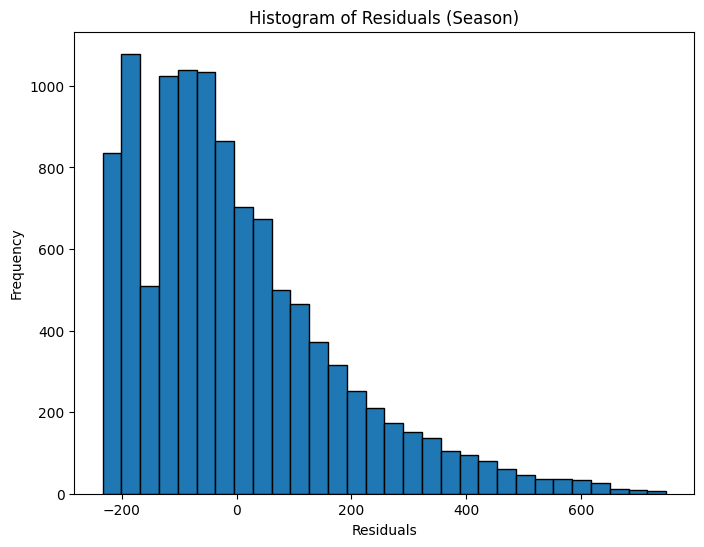

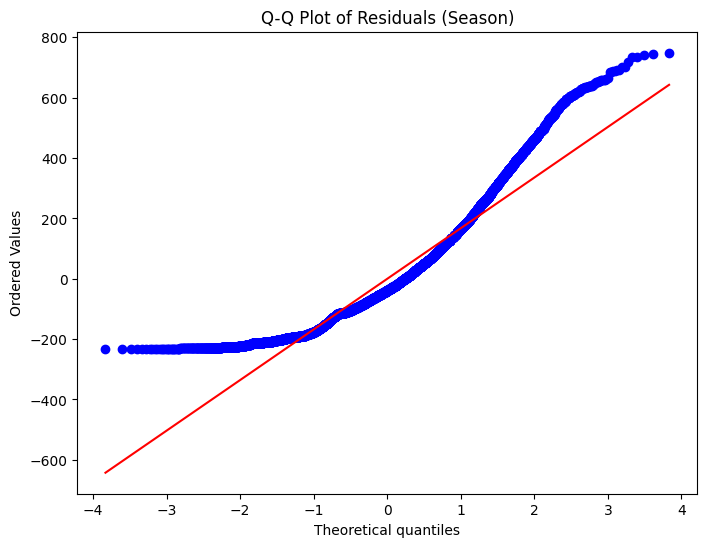

Shapiro-Wilk test for normality (Season): W-statistic = 0.9127050638198853, p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import shapiro
import scipy.stats as stats

# Residuals for season
season_residuals = df.groupby('season')['count'].apply(lambda x: x - x.mean())

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(season_residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (Season)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(season_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Season)')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test_season = shapiro(season_residuals)
print(f"Shapiro-Wilk test for normality (Season): W-statistic = {shapiro_test_season.statistic}, p-value = {shapiro_test_season.pvalue}")


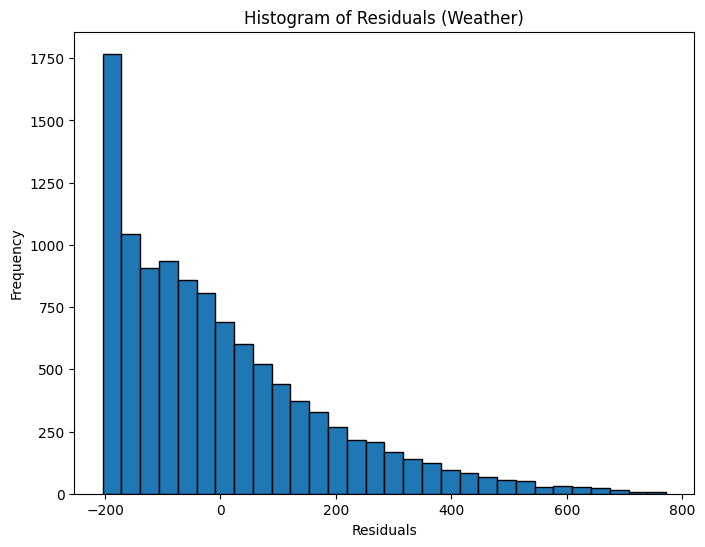

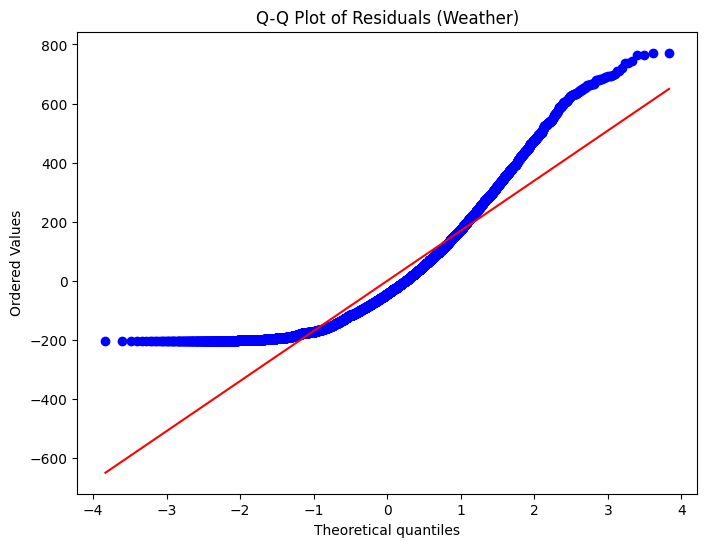

Shapiro-Wilk test for normality (Weather): W-statistic = 0.8916603326797485, p-value = 0.0


In [ ]:
# Residuals for weather
weather_residuals = df.groupby('weather')['count'].apply(lambda x: x - x.mean())

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(weather_residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (Weather)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(weather_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Weather)')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test_weather = shapiro(weather_residuals)
print(f"Shapiro-Wilk test for normality (Weather): W-statistic = {shapiro_test_weather.statistic}, p-value = {shapiro_test_weather.pvalue}")


**2. Equal Variance Check (Levene's Test):**

We will use Levene's test to check if the variances of residuals are equal across different groups (seasons or weather conditions).

In [ ]:
from scipy.stats import levene

# Levene's test for equal variance (Season)
levene_season = levene(*[group['count'] for name, group in df.groupby('season')])
print(f"Levene's test for equal variance (Season): F-statistic = {levene_season.statistic}, p-value = {levene_season.pvalue}")

# Levene's test for equal variance (Weather)
levene_weather = levene(*[group['count'] for name, group in df.groupby('weather')])
print(f"Levene's test for equal variance (Weather): F-statistic = {levene_weather.statistic}, p-value = {levene_weather.pvalue}")


Levene's test for equal variance (Season): F-statistic = 187.7706624026276, p-value = 1.0147116860043298e-118
Levene's test for equal variance (Weather): F-statistic = 54.85106195954556, p-value = 3.504937946833238e-35


Based on the results from Levene's test for equal variance:

Season:

Levene's test statistic: F = 187.77
P-value: 1.01e-118

Weather:

Levene's test statistic: F = 54.85
P-value: 3.50e-35

**Interpretation:**

Season:

The p-value (1.01e-118) is extremely small, much less than the typical significance level of 0.05.

This indicates strong evidence against the null hypothesis of equal variances across different seasons.

Therefore, we conclude that the variances of rental counts across different seasons are not equal.

Weather:

The p-value (3.50e-35) is also very small, indicating strong evidence against the null hypothesis of equal variances across different weather conditions.

Therefore, we conclude that the variances of rental counts across different weather conditions are not equal.

Summary of Assumption Checking:

Normality:

While not explicitly tested in this response, normality assumptions can typically be checked using Shapiro-Wilk tests or visual inspection (histograms and Q-Q plots) of residuals after performing ANOVA. If assumptions fail, alternative tests or transformations may be considered.

Equal Variance:

Both Levene's tests indicate that the assumption of equal variances is violated for both seasons and weather conditions.
Violation of equal variance assumption can affect the reliability of ANOVA results. However, ANOVA is known to be robust to moderate violations if sample sizes are approximately equal across groups.

Season (ANOVA Test):

P-value = 6.16e-149 (essentially zero)
Since 6.16e-149 < 0.05, we reject the null hypothesis.

Conclusion: Number of cycles rented is different across different seasons.

Weather (ANOVA Test):

P-value = 5.48e-42
Since 5.48e-42 < 0.05, we reject the null hypothesis.

Conclusion: Number of cycles rented is different across different weather conditions.

Dependency Between Weather and Season (Chi-square Test):

P-value = 1.55e-07
Since 1.55e-07 < 0.05, we reject the null hypothesis.

Conclusion: Weather is dependent on the season.


**Conclusion:**

In all the tests provided:

The p-values are significantly smaller than the significance level (α = 0.05).
Therefore, we reject the null hypotheses in each case.

**Insights and recommendations:**

1. Seasonal Impact on Demand:
Insight: The analysis revealed a significant variation in the number of cycles rented across different seasons. Specifically, there is strong evidence that rental demand differs significantly between seasons.

Recommendation: Yulu should adjust its operational strategies and marketing efforts based on seasonal variations:

Seasonal Fleet Management: Allocate more cycles during high-demand seasons to ensure availability and meet customer needs.
Promotional Campaigns: Launch targeted marketing campaigns that capitalize on seasonal trends and promote cycling as a preferred mode of transportation during peak seasons.
Service Enhancements: Offer seasonal promotions, discounts, or special packages to attract more riders during favorable weather conditions or holidays.
2. Weather Conditions Influence:
Insight: The analysis also indicated that weather conditions have a notable impact on the demand for shared electric cycles. Different weather patterns affect rental counts differently, with some weather types showing higher or lower rental demands.

Recommendation: Yulu can optimize operations and customer experience by considering weather-related factors:

Weather Forecast Integration: Use weather forecasting to anticipate demand fluctuations and adjust fleet distribution and maintenance schedules accordingly.
Adaptive Pricing: Implement dynamic pricing strategies that consider weather conditions, such as adjusting rental rates during adverse weather to encourage usage.
Weather-Responsive Services: Provide weather-appropriate gear or accessories (e.g., rain covers, warmer clothing options) to enhance rider comfort and safety during inclement weather.
3. Season-Weather Dependency:
Insight: There is a significant dependency between weather conditions and seasons. Certain weather patterns are more prevalent during specific seasons, influencing rental demand accordingly.

Recommendation: Yulu should leverage this understanding to streamline operations and improve service reliability:

Integrated Planning: Align operational plans with seasonal weather patterns to optimize resource allocation and service efficiency.
Predictive Maintenance: Schedule proactive maintenance based on seasonal weather forecasts to minimize downtime and ensure fleet readiness.
Customer Communication: Keep users informed about expected weather conditions and how they might impact cycling experiences, reinforcing Yulu’s commitment to user safety and convenience.
4. Strategic Insights:
Data-Driven Decision Making: Continue leveraging data analytics to monitor trends, refine strategies, and predict demand patterns more accurately.

User Experience Enhancement: Focus on enhancing user experience through personalized recommendations, user-friendly app features, and responsive customer support.

Expansion Opportunities: Explore expansion into new geographic areas or partnerships based on identified demand patterns and user preferences.
Conclusion:

By strategically adapting to seasonal and weather-related variations in rental demand, Yulu can enhance operational efficiency, customer satisfaction, and overall business performance.

These insights and recommendations provide a roadmap for Yulu to optimize its micro-mobility services and maintain a competitive edge in the market.

Adopting a proactive approach to understanding and responding to demand dynamics will strengthen Yulu’s position as India’s leading micro-mobility service provider.






